In [282]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# this option pandas to display whole columns in data frame
pd.pandas.set_option("display.max_columns",None)
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import boxcox
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from scipy.special import boxcox1p
import sweetviz
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from sklearn.pipeline import make_pipeline
import xgboost as xgb


## All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

## LEST FOLLOW THE PATH
#### DATA ANALYSIS

In [2]:
#lets read the data and display all the columns
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
#lets see the shape
df.shape

(4340, 8)

In [5]:
#lets se size
df.size

34720

In [6]:
#its seeing that good amount of data present in it
#lets explore more init
#lets see for null value
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
##ummm good no null value in
##let see info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


## conclusiobn
* There categorical value like name, fuel,seller_type,transmission,owner
* There are some numerical value like selling_price(traget_varible),km_driven
* A temper varible year

In [8]:
#lets explore more
#lets see for describe
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## what we get  from five pont summary
* selling_price(target),look like it right_skewed
* km_driven look like normal, but right_skewed

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


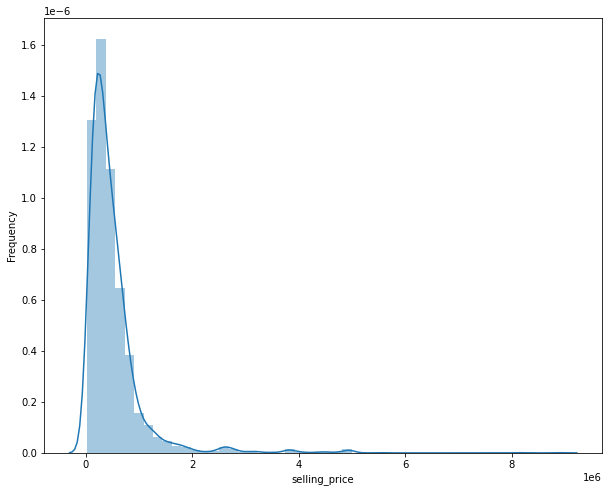

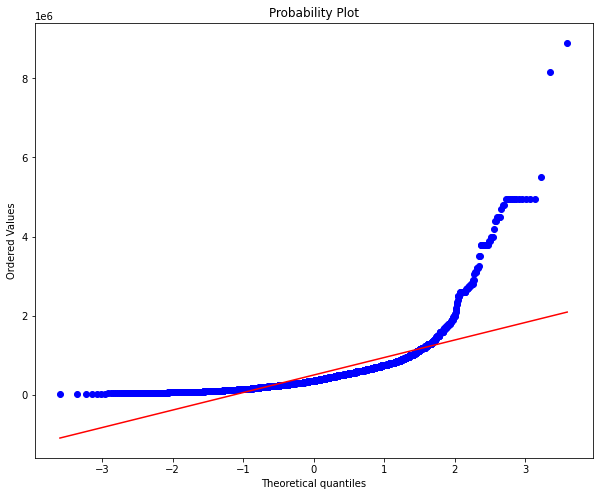

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


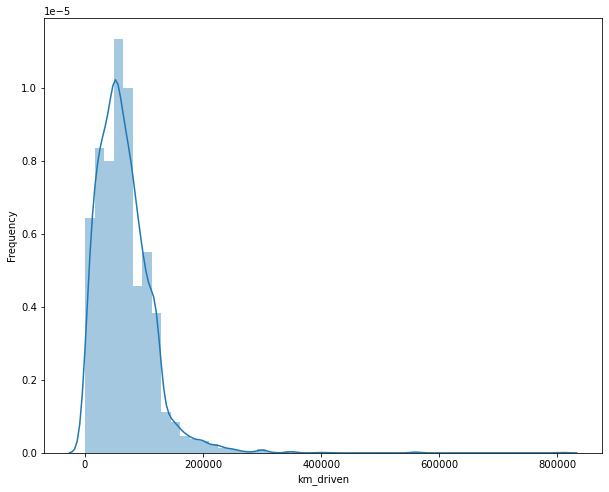

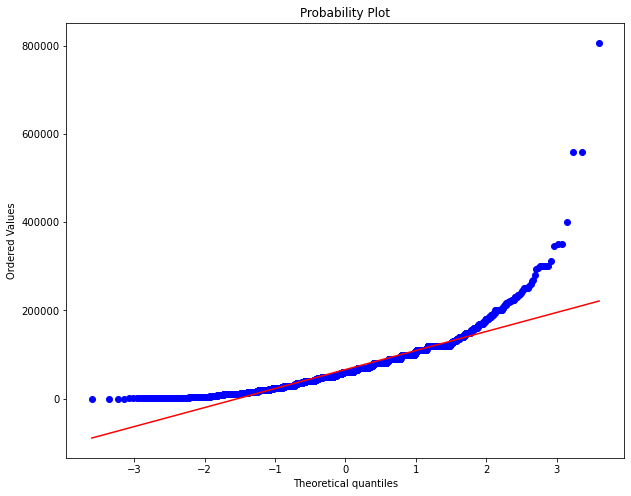

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


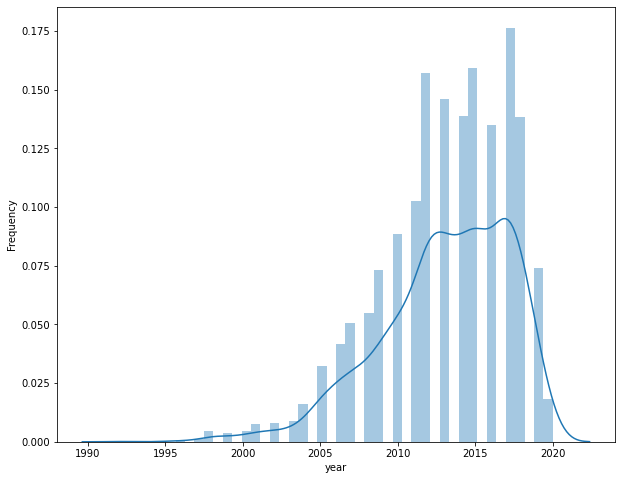

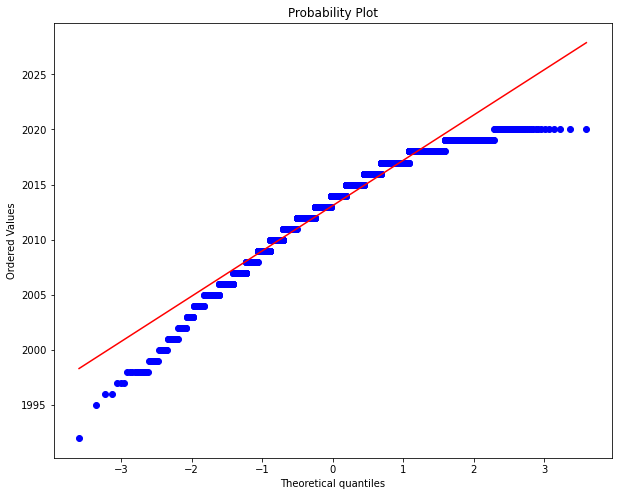

In [9]:
# lets viualized it to understand more about
for col in df[["selling_price","km_driven","year"]]:
    plt.figure(figsize=(10,8))
    ax=sns.distplot(df[col])
    ax.set(xlabel=col,ylabel="Frequency")
    plt.show()
    plt.figure(figsize=(10,8))
    stats.probplot(df[col],plot=plt)
    plt.show()

## what we see above
* Selling_price is right skewed and km_driven to, so they need (box_cox transformation, or log_trasnformation ) as they are show log normal distibution
* Year is showing possion distribution, lets see what we can do for it

In [10]:
#lets explore more
# list compresion for categorical value
categorical_var=[feature for feature in df.columns if df[feature].dtypes=="O" and feature not in ["name"]]
categorical_var

['fuel', 'seller_type', 'transmission', 'owner']

In [11]:
#lets see unique value in them
for var in df[categorical_var]:
    print(var,"has unique feature {}".format(df[var].unique()))
    print()

fuel has unique feature ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']

seller_type has unique feature ['Individual' 'Dealer' 'Trustmark Dealer']

transmission has unique feature ['Manual' 'Automatic']

owner has unique feature ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']



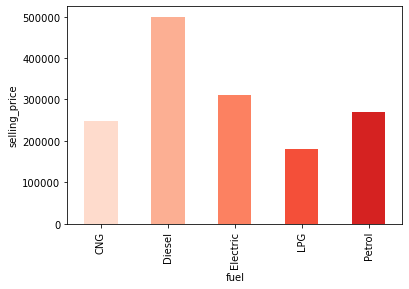

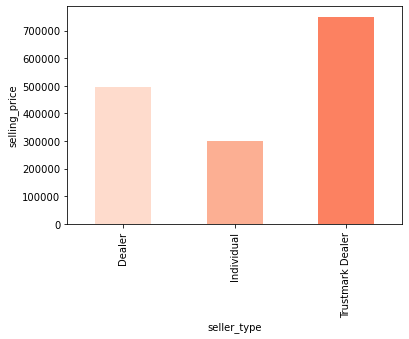

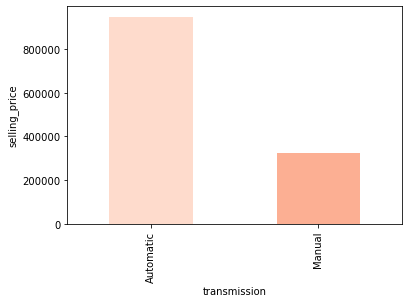

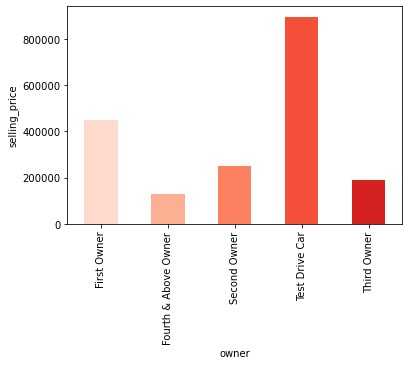

In [12]:
# lest viualized it what affect of it on selling_price(target column)
for col in df[categorical_var]:
    data=df.copy()
    data.groupby(col)["selling_price"].median().plot.bar(color=sns.color_palette("Reds"))
    plt.xlabel(col)
    plt.ylabel("selling_price")
    plt.show()

## Above conclusio
* Diesel car are more costly
* trustmarkDealer sold car for more price
* first owner car are most costly
* automatic car are  most costly



<AxesSubplot:xlabel='year'>

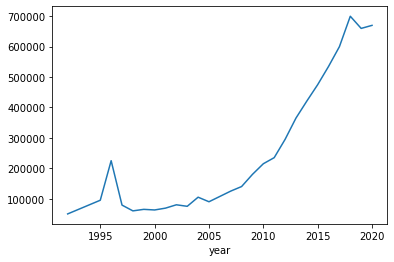

In [13]:
#lest see selling price w.r.t to year
df.groupby("year")["selling_price"].median().plot()

## what we come to know
* 2020 car are most costly as they are new
* expontail increase in price w.r.t year
* we car chance this "year", year_old by subracting with 2020
* let see what happen

In [14]:
#lets see what happen
data=df.copy()
data["Year_old"]=2020-data["year"]

In [15]:
#lest see
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Year_old
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


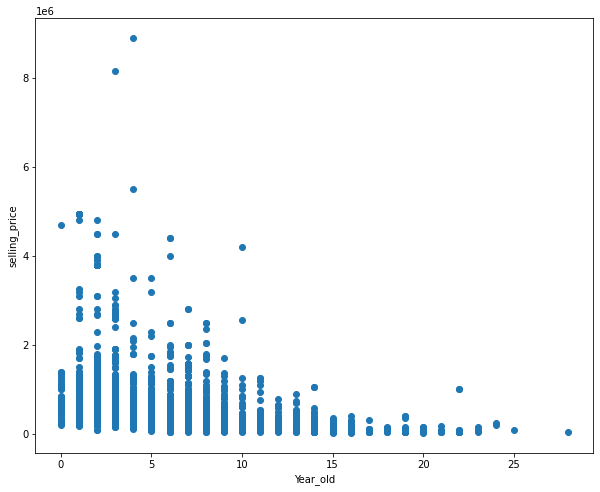

In [16]:
#lets see plot again
plt.figure(figsize=(10,8))
plt.scatter(x=data["Year_old"],y=data["selling_price"])
plt.xlabel("Year_old")
plt.ylabel("selling_price")
plt.show()

<AxesSubplot:xlabel='Year_old'>

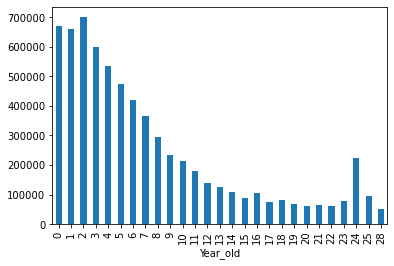

In [17]:
#let's see bar
data.groupby("Year_old")["selling_price"].median().plot.bar()

## what we get
* Expontial dicrease ,theren are  one or two peek they are oulier we we handel in feature engineering part
### In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model.

In [18]:
old_data=data.copy()
x=old_data[["year","km_driven"]]
y=old_data["selling_price"]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     449.7
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          3.41e-178
Time:                        10:19:51   Log-Likelihood:                -63333.
No. Observations:                4340   AIC:                         1.267e+05
Df Residuals:                    4337   BIC:                         1.267e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.112e+08   4.21e+06    -26.408      0.000   -1.19e+08   -1.03e+08
year        5.551e+04   2089.613     26.566      0.000    5.14e+04    5.96e+04
km_driven     -0.2796      0.189     -1.481      0.139      -0.650       0.091
==============================================================================
Omnibus:                     4650.584   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           381421.757
Skew:                           5.370   Prob(JB):                         0.00
Kurtosis:                      47.653   Cond. No.                     4.27e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ACCORDING TO ABOVE OBSERVATION KM_DRIVE IS DUMP FEATUIRE TO KEEP AS P>0.05

## lets viualized more w.r.t pandas_profileing_report

In [19]:
#this method is not good for large data
profile=ProfileReport(df,title='Pandas Profiling Report', explorative=True)

In [20]:
profile.to_widgets()

In [21]:
## to see in HTTML formate 
profile.to_file("output.html")

## lets see by one more methodalled sweetized method

In [251]:
#sweetized method of anaysis
report=sweetviz.analyze([df,"cardekho"],target_feat="selling_price")

:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [254]:
##lets check it report
report.show_html("sweetziv_report.html")

Report sweetziv_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## what we come to know from above
- "name" feature didn't need much as it has high cardinality, low correlation
- there are show amny duplicate column they will be handel in feature engineering section


In [22]:
##lets see some correlation
old_data.corr()

,year,selling_price,km_driven,Year_old
year,1.000000,0.413922,-0.419688,-1.000000
selling_price,0.413922,1.000000,-0.192289,-0.413922
km_driven,-0.419688,-0.192289,1.000000,0.419688
Year_old,-1.000000,-0.413922,0.419688,1.000000


<AxesSubplot:>

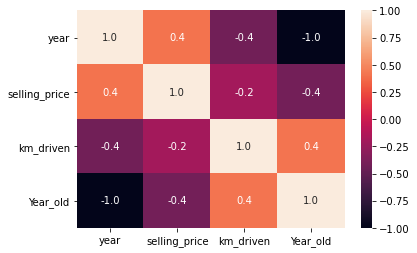

In [23]:
#lets visualized it
sns.heatmap(old_data.corr(),
           annot=True,
           fmt=".1f")

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


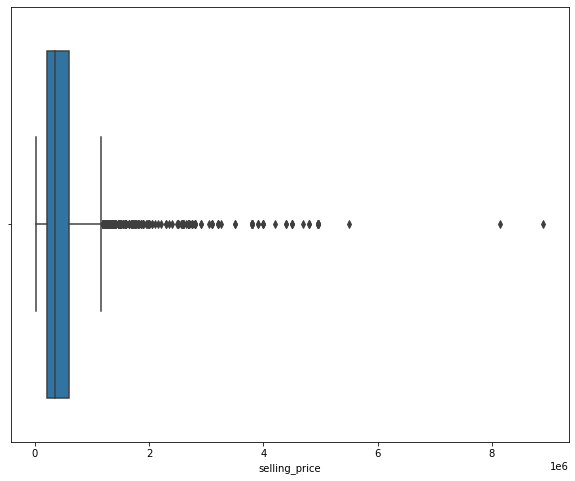

In [24]:
# lets check for outlier
plt.figure(figsize=(10,8))
sns.boxplot(df["selling_price"])
plt.show()


## There is no symtom of multicollinearity

# lets start with feature engineering section

#To do so lets first separt train feature from test
- lets do with train_test_splite(random sampler)
- and stratified sampler

In [25]:
## lets delete outlier
target=df["selling_price"]
target=target.sort_values(ascending=True)
quertile3,quertile1=np.percentile(target,(75,25))
IQR=quertile3-quertile1
upeer_bound=quertile3+(IQR*1.5)
lower_bound=quertile1-(IQR*1.5)

In [26]:
print(lower_bound,upeer_bound)

-378125.625 1186875.375


In [27]:
##price can,t be negative
df.drop(df[df["selling_price"]>1186875.375].index,inplace=True)

In [175]:
#lets do spliting and compaier which is better
new_data=df.copy()
x=new_data.drop("selling_price",axis=1)
y=new_data["selling_price"]
split=StratifiedShuffleSplit(n_splits=1,test_size=0.6,random_state=42)
for train_index,test_index in split.split(x,y):
    strat_train=new_data.loc[train_index]
    strat_test=new_data.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

## This because of the nature of stratification. The stratify parameter set it to split data in a way to allocate test_size amount of data to each class. In this case, you don't have sufficient class labels of one of your classes to keep the data splitting ratio equal to test_size.

In [176]:
# let's try train_test_split
pd.DataFrame.drop_duplicates(new_data,inplace=True)
x=new_data.drop("selling_price",axis=1)
y=new_data["selling_price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)

In [177]:
x_train.shape,x_test.shape

((2710, 7), (678, 7))

In [178]:
#lets dell with temper varible first
x_train["year_old"]=2020-x_train["year"]
x_test["year_old"]=2020-x_test["year"]


#lets drop  year as it has no use
x_train.drop("year",axis=1,inplace=True)
x_test.drop("year",axis=1,inplace=True)

<ipython-input-178-fd17e9bcba3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["year_old"]=2020-x_train["year"]
<ipython-input-178-fd17e9bcba3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["year_old"]=2020-x_test["year"]
C:\Users\risha\Desktop\cardekho\env\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [179]:
#lets drop km_driven as we have seen in EDA that it is fluke as p>0.05
x_train.drop("km_driven",axis=1,inplace=True)
x_test.drop("km_driven",axis=1,inplace=True)
#lets drop name no use of it has high cardinality
x_train.drop("name",axis=1,inplace=True)
x_test.drop("name",axis=1,inplace=True)

In [180]:
x_train.head()

,fuel,seller_type,transmission,owner,year_old
325,Diesel,Individual,Manual,First Owner,1
1497,Diesel,Individual,Manual,Second Owner,9
939,Diesel,Dealer,Automatic,First Owner,3
2082,Petrol,Individual,Manual,Second Owner,9
2808,Diesel,Individual,Manual,First Owner,3


In [181]:
#lets seprate categorical variable from numerical
categorical_var=[feature for feature in x_train.columns if x_train[feature].dtypes=="O"]
numerical_var=[feature for feature in x_train.columns if x_train[feature].dtypes!="O"]

In [182]:
#lets check for it
categorical_var

['fuel', 'seller_type', 'transmission', 'owner']

## lets deal with categorical first

In [183]:
for var in x_train[categorical_var]:
    print(var,"has unique value {}".format(x_train[var].unique()))

fuel has unique value ['Diesel' 'Petrol' 'CNG' 'LPG']
seller_type has unique value ['Individual' 'Dealer' 'Trustmark Dealer']
transmission has unique value ['Manual' 'Automatic']
owner has unique value ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


## let convert them in numerical
- seller_types,transmissin can be used to convert with dummie
- fuel,owner can be converted by manual

In [184]:
#lerts apply ordinal encoding on fluel and owner
for col in x_train[["fuel","owner"]]:
    OE=OrdinalEncoder()
    OE.fit((x_train[col].values).reshape(-1, 1))
    x_train[col]=OE.transform((x_train[col].values).reshape(-1, 1))


<ipython-input-184-306fc43b494b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col]=OE.transform((x_train[col].values).reshape(-1, 1))
<ipython-input-184-306fc43b494b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col]=OE.transform((x_train[col].values).reshape(-1, 1))


In [185]:
x_train.head()

,fuel,seller_type,transmission,owner,year_old
325,1.0,Individual,Manual,0.0,1
1497,1.0,Individual,Manual,2.0,9
939,1.0,Dealer,Automatic,0.0,3
2082,3.0,Individual,Manual,2.0,9
2808,1.0,Individual,Manual,0.0,3


In [186]:
#lets apply on test data
for col in x_test[["fuel","owner"]]:
    oe=OrdinalEncoder()
    oe.fit(x_test[col].values.reshape(-1,1))
    x_test[col]=oe.transform(x_test[col].values.reshape(-1,1))

<ipython-input-186-8ed0bbc2bc7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col]=oe.transform(x_test[col].values.reshape(-1,1))
<ipython-input-186-8ed0bbc2bc7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col]=oe.transform(x_test[col].values.reshape(-1,1))


In [187]:
x_test.head()

,fuel,seller_type,transmission,owner,year_old
441,1.0,Dealer,Manual,2.0,7
1682,1.0,Individual,Manual,0.0,7
1815,4.0,Individual,Manual,0.0,8
1710,4.0,Individual,Manual,2.0,13
2548,1.0,Individual,Manual,0.0,5


In [188]:
#lets apply dummie on other
x_train=pd.get_dummies(x_train,drop_first=True)
x_test=pd.get_dummies(x_test,drop_first=True)

In [189]:
x_train.head()

,fuel,owner,year_old,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
325,1.0,0.0,1,1,0,1
1497,1.0,2.0,9,1,0,1
939,1.0,0.0,3,0,0,0
2082,3.0,2.0,9,1,0,1
2808,1.0,0.0,3,1,0,1


In [190]:
x_train.shape,x_test.shape

((2710, 6), (678, 6))

In [191]:
y_train.shape,y_test.shape

((2710,), (678,))

In [192]:
#lets apply box_cox transformation on target

y_train,thresh=boxcox(y_train)

## threshold value indicate
- threshold(lambda) = -1. is a reciprocal transform.
- threshold(lambda) = -0.5 is a reciprocal square root transform.
- threshold(lambda) = 0.0 is a log transform.
- threshold(lambda) = 0.5 is a square root transform.
- threshold(lambda) = 1.0 is no transform.

In [193]:
y_train.shape

(2710,)

In [194]:
##lets do for test to
y_test,thesh=boxcox(y_test)

In [195]:
y_test.shape

(678,)

In [196]:
y_test=pd.DataFrame(y_test,columns=["selling_price"])
y_train=pd.DataFrame(y_train,columns=["selling_price"])

## lets start EDA-2 part

In [197]:
#lets check for correlation again
x_train.head()

,fuel,owner,year_old,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
325,1.0,0.0,1,1,0,1
1497,1.0,2.0,9,1,0,1
939,1.0,0.0,3,0,0,0
2082,3.0,2.0,9,1,0,1
2808,1.0,0.0,3,1,0,1


In [198]:
#let create a data frame what is affec of categorical feature when convarted into numerical
x_new=x_train.copy()
y_new=y_train.copy()
check=pd.merge(x_new,y_new,left_index=True,right_index=True)

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


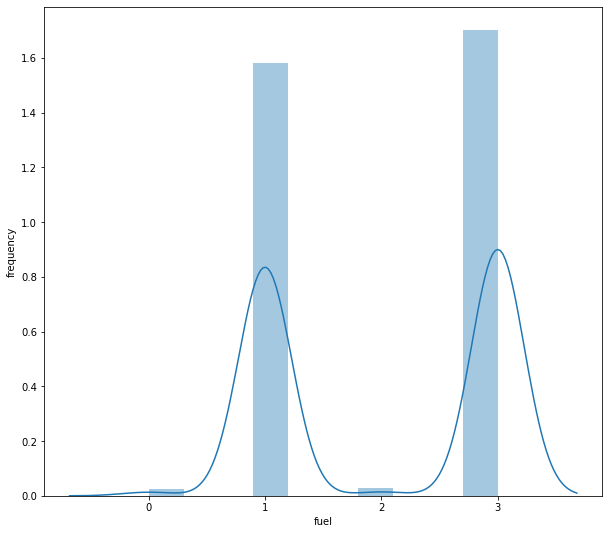

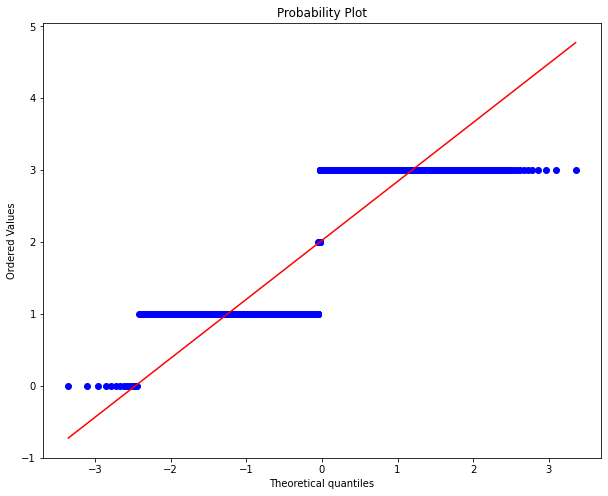

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


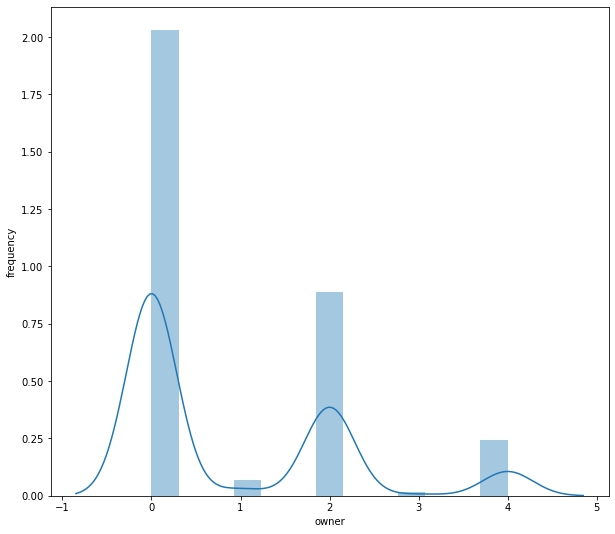

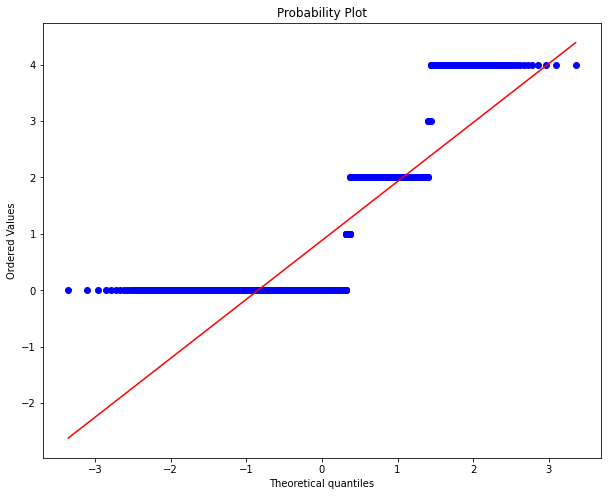

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


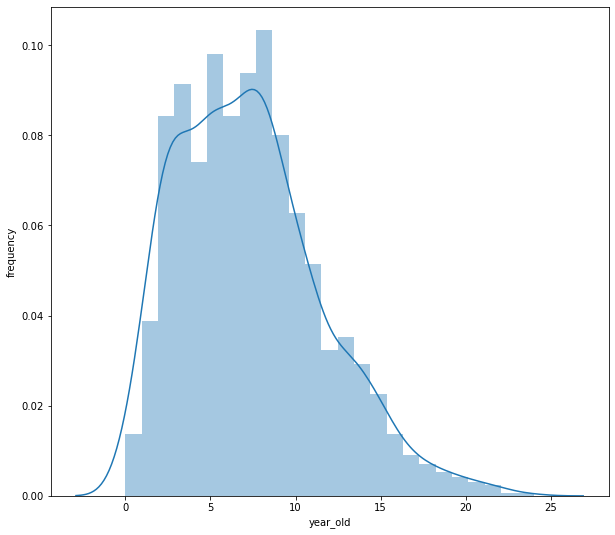

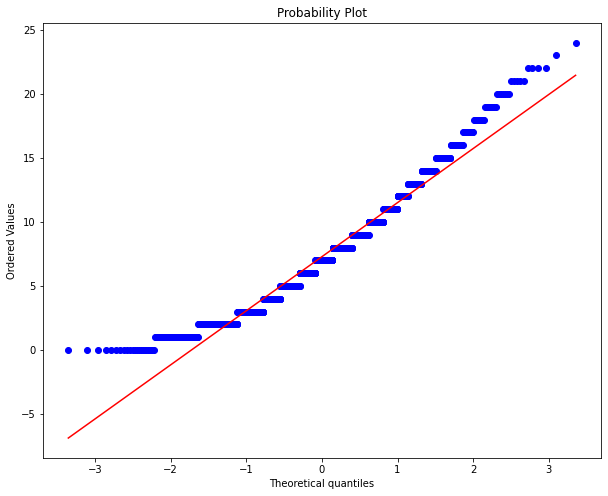

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


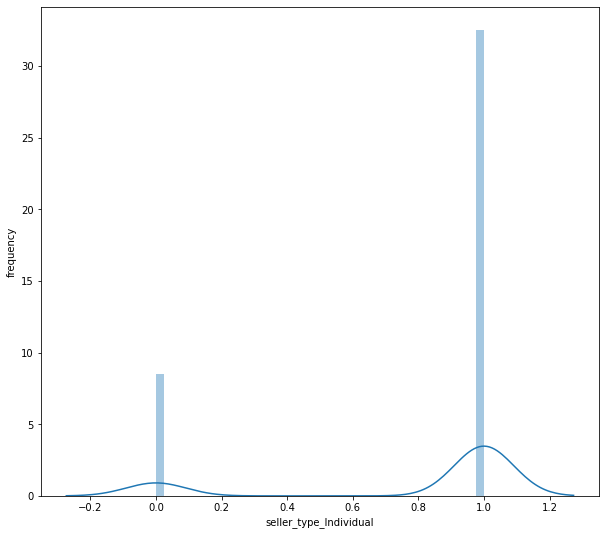

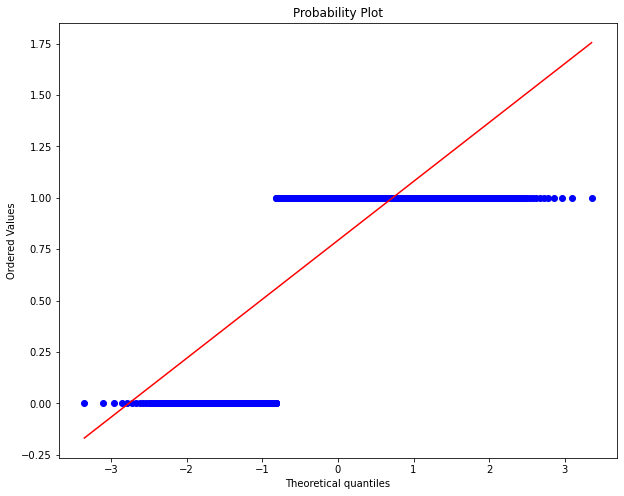

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


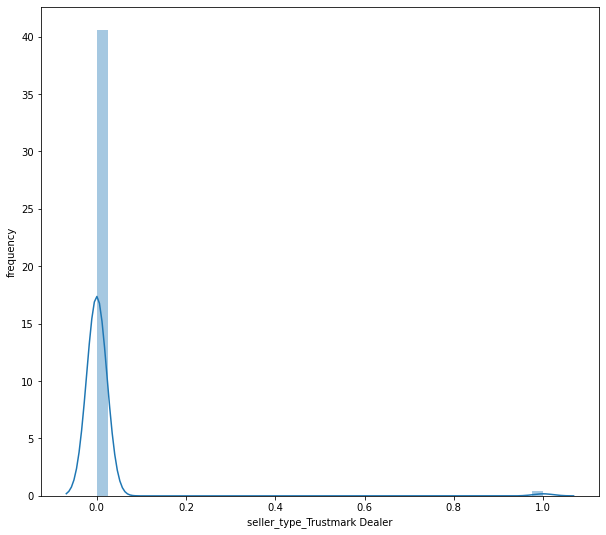

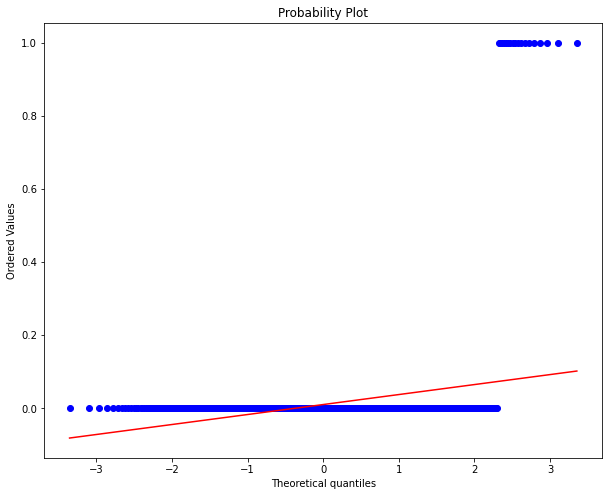

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


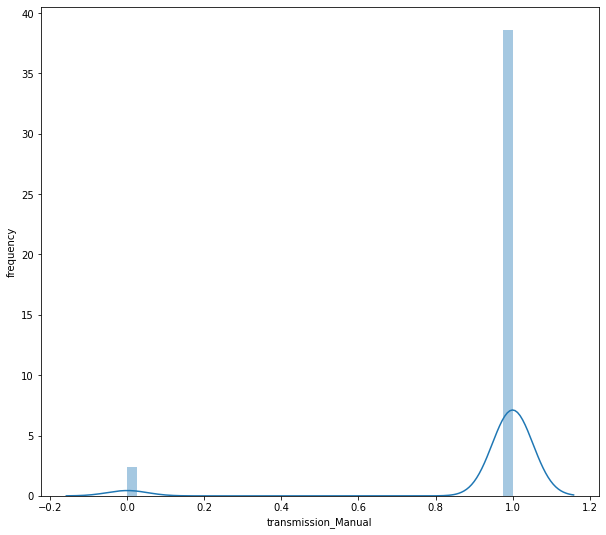

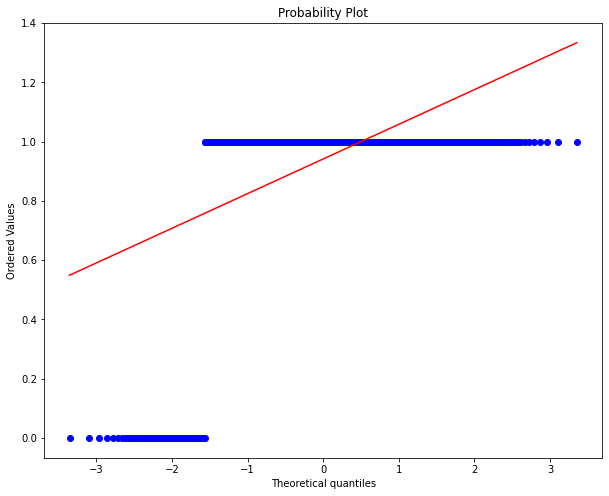

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


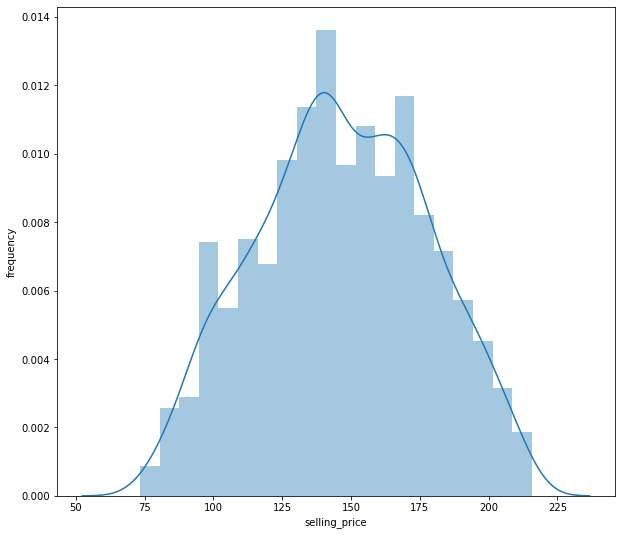

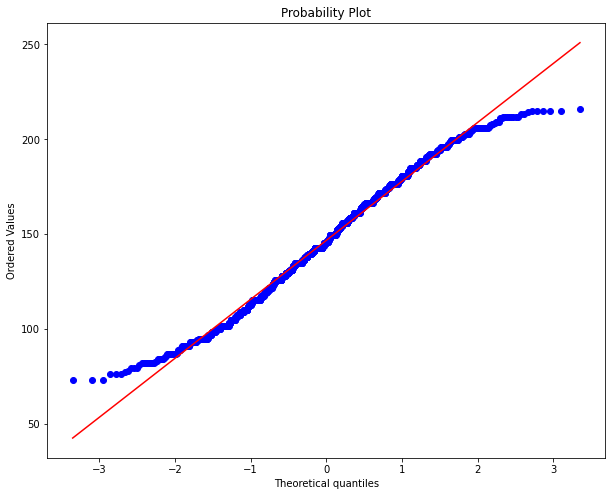

In [161]:
#lets see distribution
for col in check.columns:
    plt.figure(figsize=(10,9))
    ax=sns.distplot(check[col])
    ax.set(xlabel=col,ylabel="frequency")
    plt.show()
    
    
    plt.figure(figsize=(10,8))
    stats.probplot(check[col],plot=plt)
    plt.show()

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


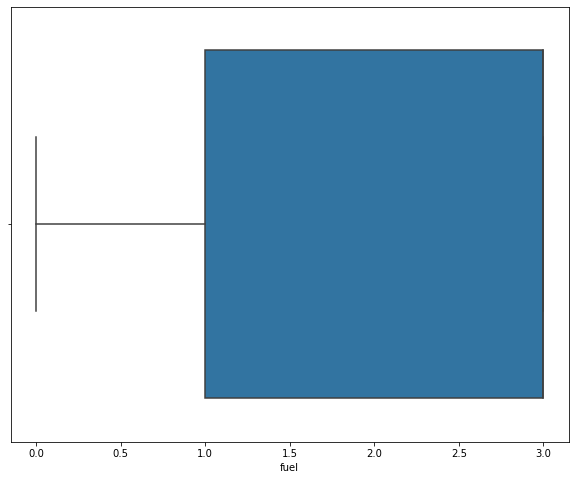

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


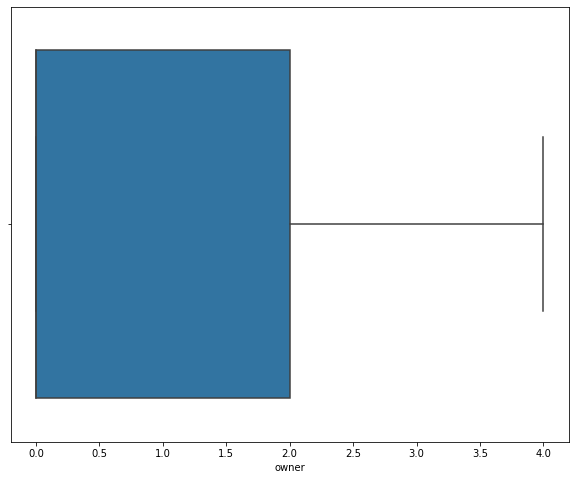

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


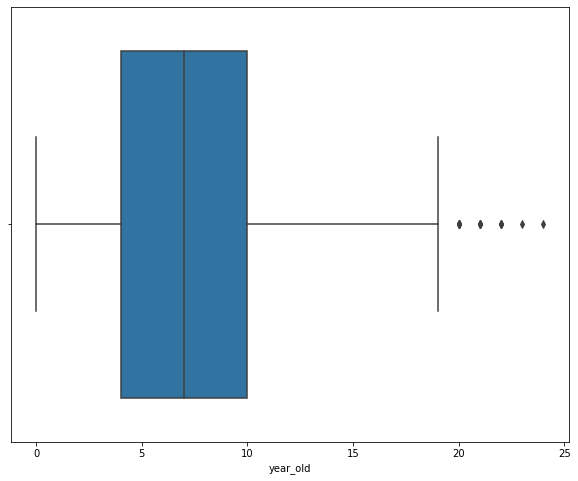

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


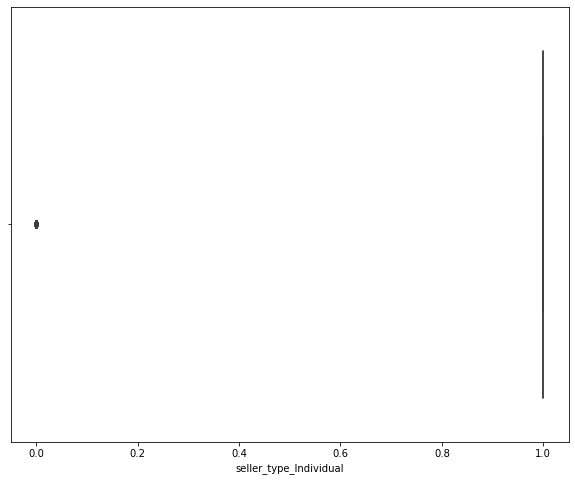

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


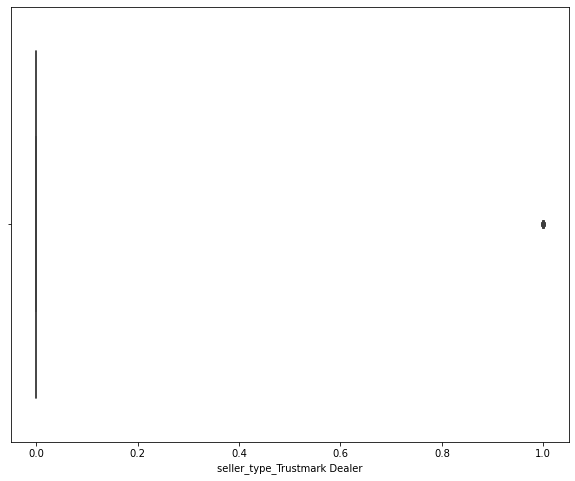

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


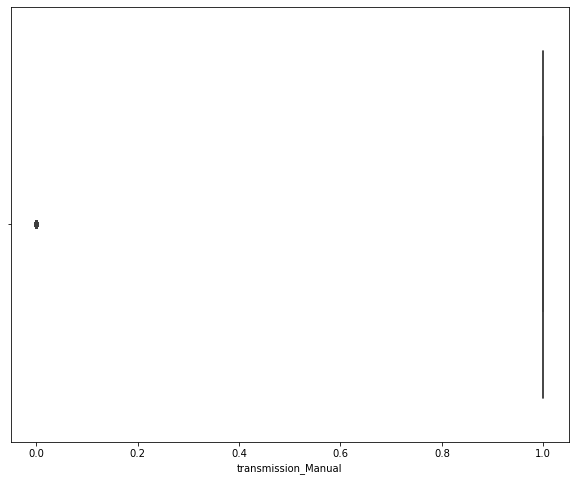

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


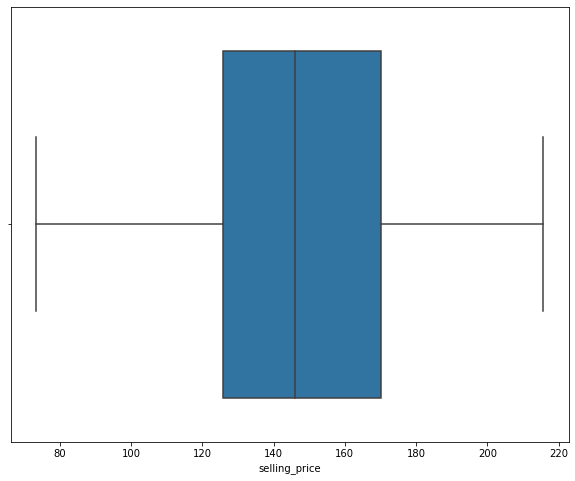

In [53]:
# lets check for outlier
for col in check.columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(check[col])
    plt.show()

In [199]:
# lets see OLS model
x=check.drop("selling_price",axis=1)
y=check["selling_price"]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7395
Date:                Sat, 03 Oct 2020   Prob (F-statistic):              0.618
Time:                        11:57:10   Log-Likelihood:                -8464.2
No. Observations:                1743   AIC:                         1.694e+04
Df Residuals:                    1736   BIC:                         1.698e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          144.5199      3.810     37.937      0.000     137.048     151.992
fuel                             0.9891      0.747      1.324      0.186      -0.476       2.454
owner                           -0.9186      0.657     -1.398      0.162      -2.208       0.370
year_old                         0.1128      0.190      0.593      0.554      -0.261       0.486
seller_type_Individual           1.1227      1.930      0.582      0.561      -2.663       4.908
seller_type_Trustmark Dealer    -3.3198      7.556     -0.439      0.660     -18.140      11.500
transmission_Manual             -0.6623      3.209     -0.206      0.837      -6.956       5.632
==============================================================================
Omnibus:                       83.743   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.270
Skew:                          -0.028   Prob(JB):                     3.62e-08
Kurtosis:                       2.315   Cond. No.                         89.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#lets see profile
profile=ProfileReport(check,title="pandas profile",explorative=True)

In [56]:
profile.to_widgets()

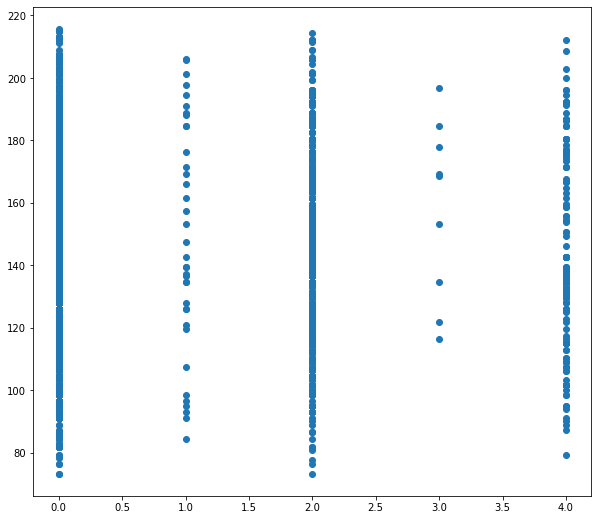

In [57]:
plt.figure(figsize=(10,9))
plt.scatter(check["owner"],check["selling_price"])
plt.show()

In [58]:
x_test.shape ,y_test.shape

((678, 6), (678, 1))

In [59]:
x_train.shape ,y_train.shape

((2710, 6), (2710, 1))

In [200]:

##lets see how the cross vall score look 
clf = RandomForestRegressor()
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py:531:

array([0.57938632, 0.6211616 , 0.58960803, 0.61270428, 0.58706575])

In [201]:
#lets see what is value of R2
model=clf.fit(x_train,y_train)
y_predict=model.predict(x_test)

<ipython-input-201-3abda4117bbb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=clf.fit(x_train,y_train)


In [202]:
model.score(x_test,y_test)

-0.12433984993282565

In [203]:
#applying scaling on target columns as it value far from each othe so lets standarized it
ss=ss=RobustScaler()
data1=ss.fit_transform((y_test).values.reshape(-1, 1))
y_test=pd.DataFrame(data1,columns=["selling_price"])


In [204]:
ss=ss=RobustScaler()
data1=ss.fit_transform(y_train.values.reshape(-1,1))
y_train=pd.DataFrame(data1,columns=["selling_price"])


In [212]:
##root mean square log error
def RMS(y_test,pred):
    rmse=np.sqrt(mean_squared_log_error(y_test,pred))
    return rmse

In [216]:
RMS(np.abs(y_test),y_predict)

4.577217688749663

In [219]:
## lets aplly lasso model
linear_model=make_pipeline(Lasso(random_state=42,
                  fit_intercept=True,
                  alpha=0.0009))
linear_model=linear_model.fit(x_train,y_train)
linear_pred=linear_model.predict(x_test)
print("ef test mse {}".format(RMS(np.abs(y_test),np.abs(linear_pred))))
linear_model.score(x_test,y_test)


ef test mse 0.26294226487993405


0.5478996568566472

In [223]:
linear_pred

array([ 2.96093126e-01,  2.09696285e-01, -4.73891587e-01, -1.02391487e+00,
        4.07428308e-01, -4.37289663e-02,  6.05160331e-01,  4.07428308e-01,
       -1.71597695e+00,  1.54003057e-01, -1.77293552e-01,  4.50652365e-01,
       -1.32051291e+00,  1.19304483e-01, -7.98336235e-01,  6.36625287e-02,
       -6.71623610e-01,  6.36625287e-02,  2.52869069e-01, -2.76159563e-01,
        1.19642617e-02,  5.06294320e-01,  9.01758366e-01, -7.27316838e-01,
       -5.93752252e-01,  2.09696285e-01,  4.07428308e-01, -1.91370898e+00,
        2.52869069e-01, -6.71623610e-01,  3.60260563e-01,  9.83611026e-02,
       -5.93752252e-01, -7.84275402e-02,  5.89504957e-01,  1.10830273e-01,
       -5.72757598e-01,  1.10830273e-01,  1.62528540e-01, -1.02391487e+00,
       -1.02391487e+00, -8.81876077e-01, -1.17847411e+00, -8.69355633e-01,
       -1.89762723e-01, -4.37289663e-02,  7.47250400e-01,  2.04384714e-02,
        4.50601092e-01, -8.69355633e-01,  5.46280900e-01, -8.81876077e-01,
       -3.40327001e-01, -

In [230]:
predict=pd.DataFrame(linear_pred,columns=["selling_price_predict"])

In [231]:
predict

,selling_price_predict
0,0.296093
1,0.209696
2,-0.473892
3,-1.023915
4,0.407428
...,...
673,-0.177294
674,-1.122781
675,0.549518
676,0.846116


In [237]:
comp=pd.merge(predict,y_test,left_index=True,right_index=True)

In [238]:
comp.head()

,selling_price_predict,selling_price
0,0.296093,0.468265
1,0.209696,0.352304
2,-0.473892,-0.062936
3,-1.023915,-0.782159
4,0.407428,0.576197


## lets see how the data look like

<Figure size 720x1080 with 0 Axes>

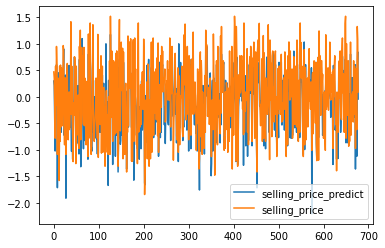

In [243]:
plt.figure(figsize=(10,15))
comp.plot()
plt.show()

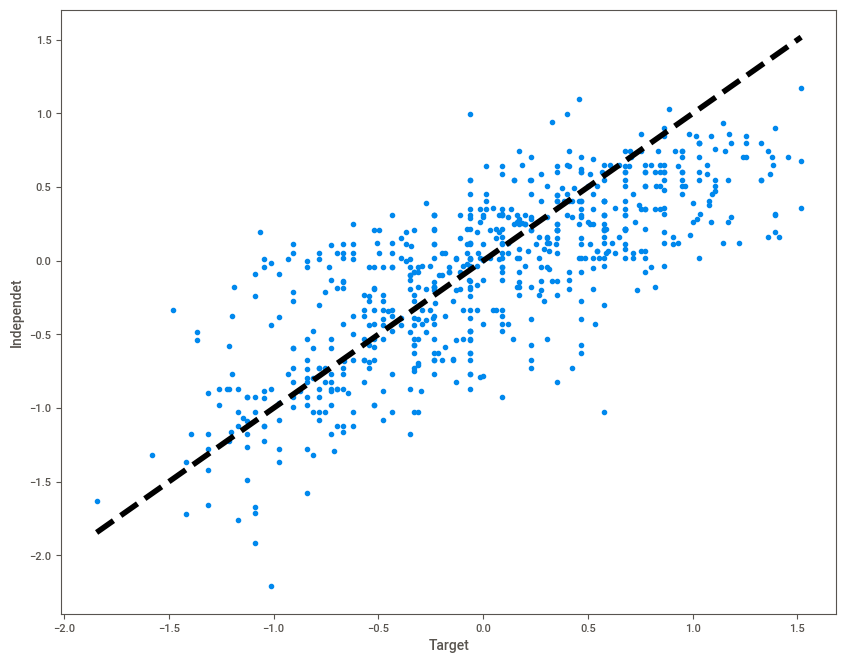

In [272]:
plt.figure(figsize=(10,8))
plt.scatter(x=comp["selling_price"],y=comp["selling_price_predict"])
plt.plot([comp["selling_price"].min(), comp["selling_price"].max()], [comp["selling_price"].min(), comp["selling_price"].max()], 'k--', lw=4)
plt.xlabel("Target",weight="bold")
plt.ylabel("Independet",weight="bold")
plt.show()

In [274]:
##lets apply on more algo
linear_model=make_pipeline(ElasticNet(random_state=42,
                  fit_intercept=True,
                  alpha=0.000542555))
linear_model=linear_model.fit(x_train,y_train)
linear_pred=linear_model.predict(x_test)
print("ef test mse {}".format(RMS(np.abs(y_test),np.abs(linear_pred))))
linear_model.score(x_test,y_test)


ef test mse 0.26308689371370697


0.547177951556042

In [280]:
xgb_model=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
eval_matric=[(x_test,y_test)]
xgb_model.fit(x_train,y_train,eval_set=eval_matric,verbose=False)
pred=xgb_model.predict(x_train)
print("ef train mse {}".format(RMS(np.abs(y_test),np.abs(linear_pred))))
xgb_pred=xgb_model.predict(x_test)
print("ef test mse  {}".format(RMS(np.abs(y_test),np.abs(linear_pred))))
xgb_model.score(x_test,y_test)

ef train mse 0.26308689371370697
ef test mse  0.26308689371370697


0.6368263870011107

In [285]:
#lets apply randomized search and gridesearch
space={'max_depth': [None,3, 18, 1],        'gamma': np.linspace(1,9,1),
        'reg_alpha' :np.arange(40,180,10),
        'reg_lambda' :np.arange(0,1,),
        'colsample_bytree' : np.arange(0.5,1,1),
        'min_child_weight' :np.arange(0, 10, 1),
        'n_estimators':np.arange(10,1000,10),
        'seed':np.arange(0,100)
    }
xgb_turn=RandomizedSearchCV(xgb_model,
                          param_distributions=space,
                          n_iter=100,
                           cv=5,
                           verbose=False)
search=xgb_turn.fit(x_train,y_train)



C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\sklearn.py", line 391, in fit
    self._Booster = train(params, trainDmatrix,
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\core.py", line 1108, in update
    _check_call(_L

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\sklearn.py", line 391, in fit
    self._Booster = train(params, trainDmatrix,
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\core.py", line 1108, in update
    _check_call(_L

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\sklearn.py", line 391, in fit
    self._Booster = train(params, trainDmatrix,
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\core.py", line 1108, in update
    _check_call(_L

C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\sklearn.py", line 391, in fit
    self._Booster = train(params, trainDmatrix,
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\core.py", line 1108, in update
    _check_call(_L

In [286]:
search.score(x_test,y_test)

0.593884227472446

In [288]:
search.best_params_

{'seed': 59,
 'reg_lambda': 0,
 'reg_alpha': 40,
 'n_estimators': 890,
 'min_child_weight': 1,
 'max_depth': 18,
 'gamma': 1.0,
 'colsample_bytree': 0.5}

In [295]:
#lets  apply gride seach on based on randomized search
gride={'max_depth': [search.best_params_["max_depth"],
                    search.best_params_["max_depth"]+1,
                    search.best_params_["max_depth"]-1],        'gamma':[search.best_params_["gamma"]],
        'reg_alpha' :[search.best_params_["reg_alpha"],
                     search.best_params_["reg_alpha"]+2,
                     search.best_params_["reg_alpha"]-2],
        'reg_lambda' :[search.best_params_["reg_lambda"]],
        'colsample_bytree' :[search.best_params_["colsample_bytree"],
                            search.best_params_["colsample_bytree"]+2,
                            search.best_params_["colsample_bytree"]-2],
        'min_child_weight' :[search.best_params_["min_child_weight"],
                            search.best_params_["min_child_weight"]+1,
                            search.best_params_["min_child_weight"]-1],
        'n_estimators':[search.best_params_["n_estimators"]],
        'seed':[search.best_params_["seed"]]}
GS=GridSearchCV(xgb_model,
             param_grid=gride,
             verbose=False,
             cv=10)
score=GS.fit(x_train,y_train)


C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\sklearn.py", line 391, in fit
    self._Booster = train(params, trainDmatrix,
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\risha\Desktop\cardekho\env\lib\site-packages\xgboost\core.py", line 1108, in update
    _check_call(_L

In [296]:
score.score(x_test,y_test)

0.5950426475326991